# HIV-1 reverse transcriptase

## Table of contents <a name="TOC"></a>
* [Setup](#setup)
* [Download dataset](#download)
* [Curate dataset](#curation)
* [Homogenize](#homogenize)


## Setup <a name="setup"></a>
| [TOC](#TOC) | [Setup](#setup) | [Download dataset](#download) | [Curate dataset](#curation) | [Homogenize](#homogenize) |

In [2]:
%matplotlib inline
import numpy as np
from PDBClean import pdbclean_io, pdbutils, pdbclean_process

In [3]:
RUNDIR='./'
PROJDIR=RUNDIR+'HIV-1_RT'
seqfile='../data/pdb_seqres.txt'

In [4]:
pdbclean_io.check_project(projdir=PROJDIR)

./HIV-1_RT already exists, with content:
['1pt_bank', 'molid.list', 'Seq.afa', 'Seq.fa', 'A.afa', 'clean_bank', 'B.afa', 'B.fa', 'final_bank', 'standard_ChainID_bank', 'standard_MolID_bank', 'A.fa', 'standard_ResidueID_bank', 'fixHET_bank', 'simple_bank', 'test_homogen_bank', 'log.pkl', 'raw_bank']


## Download dataset <a name="download"></a>
| [TOC](#TOC) | [Setup](#setup) | [Download dataset](#download) | [Curate dataset](#curation) | [Homogenize](#homogenize) | 

### Retrieve reference sequence from keyword
Define the `keyword` below and run the next cell to retrieve the potential hit list

In [5]:
keyword='HIV-1 reverse transcriptase'

In [6]:
ref_sequences, ref_metadata = pdbutils.retrieve_sequence_from_PDB(keyword, 
                                                                  mode='metadata', 
                                                                  update=False, 
                                                                  seqfile=seqfile)
# store in log pickle file
pdbclean_io.log(logdir=PROJDIR, 
                action='add', 
                field=ref_sequences,
                fieldname='ref_sequences')
pdbclean_io.log(logdir=PROJDIR, 
                action='add', 
                field=ref_metadata,
                fieldname='ref_metadata')
print('{0} sequences were identified as potential hits! \n'.format(len(ref_sequences)))
for iseq in np.arange(len(ref_sequences)):
    print('{0} {1}'.format(ref_metadata[iseq], ref_sequences[iseq]))

39 sequences were identified as potential hits! 

>2rki_A mol:protein length:560  HIV-1 reverse transcriptase (RT) p66
 PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGKISKIGPENPYNTPVFAIKKKDSTKWRKLVDFRELNKRTQDFWEVQLGIPHPAGLKKKKSVTVLDVGDAYFSVPLDEDFRKYTAFTIPSINNETPGIRYQYNVLPQGWKGSPAIFQSSMTKILEPFRKQNPDIVIYQYMDDLYVGSDLEIGQHRTKIEELRQHLLRWGLTTPDKKHQKEPPFLWMGYELHPDKWTVQPIVLPEKDSWTVNDIQKLVGKLNWASQIYPGIKVRQLCKLLRGTKALTEVIPLTEEAELELAENREILKEPVHGVYYDPSKDLIAEIQKQGQGQWTYQIYQEPFKNLKTGKYARMRGAHTNDVKQLTEAVQKITTESIVIWGKTPKFKLPIQKETWETWWTEYWQATWIPEWEFVNTPPLVKLWYQLEKEPIVGAETFYVDGAANRETKLGKAGYVTNRGRQKVVTLTDTTNQKTELQAIYLALQDSGLEVNIVTDSQYALGIIQAQPDQSESELVNQIIEQLIKKEKVYLAWVPAHKGIGGNEQVDKLVSAGIRKVL

>2rki_B mol:protein length:440  HIV-1 reverse transcriptase (RT) p51
 PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGKISKIGPENPYNTPVFAIKKKDSTKWRKLVDFRELNKRTQDFWEVQLGIPHPAGLKKKKSVTVLDVGDAYFSVPLDEDFRKYTAFTIPSINNETPGIRYQYNVLPQGWKGSPAIFQSSMTKILEPFRKQNPDIVIYQYMDDLYVGSDLEIGQHRTKIEELRQHLLRWGLTTPDKKHQKEPPFLWMGYELHPDKWTVQPIVLPE

### Retrieve all sequences that match the reference sequence
(might take a while...)

In [7]:
sequences, metadata = pdbutils.retrieve_sequence_from_PDB(ref_sequences[0], 
                                                          mode='sequence', 
                                                          update=False, 
                                                          seqfile=seqfile)
for seq in ref_sequences[1:]:
    newseq, newmet = pdbutils.retrieve_sequence_from_PDB(seq, 
                                                         mode='sequence', 
                                                         update=False, 
                                                         seqfile=seqfile)
    sequences = np.append(sequences, newseq)
    metadata  = np.append(metadata, newmet)
# store in log pickle file
pdbclean_io.log(logdir=PROJDIR, 
                action='add', 
                field=sequences,
                fieldname='sequences')
pdbclean_io.log(logdir=PROJDIR, 
                action='add', 
                field=metadata,
                fieldname='metadata')
print('{0} sequences were retrieved! \n'.format(len(sequences)))
for iseq in np.arange(len(sequences)):
    print('{0} {1}'.format(metadata[iseq], sequences[iseq]))

2482 sequences were retrieved! 

>1c0t_A mol:protein length:560  HIV-1 REVERSE TRANSCRIPTASE (A-CHAIN)
 PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGKISKIGPENPYNTPVFAIKKKDSTKWRKLVDFRELNKRTQDFWEVQLGIPHPAGLKKKKSVTVLDVGDAYFSVPLDEDFRKYTAFTIPSINNETPGIRYQYNVLPQGWKGSPAIFQSSMTKILEPFRKQNPDIVIYQYMDDLYVGSDLEIGQHRTKIEELRQHLLRWGLTTPDKKHQKEPPFLWMGYELHPDKWTVQPIVLPEKDSWTVNDIQKLVGKLNWASQIYPGIKVRQLCKLLRGTKALTEVIPLTEEAELELAENREILKEPVHGVYYDPSKDLIAEIQKQGQGQWTYQIYQEPFKNLKTGKYARMRGAHTNDVKQLTEAVQKITTESIVIWGKTPKFKLPIQKETWETWWTEYWQATWIPEWEFVNTPPLVKLWYQLEKEPIVGAETFYVDGAANRETKLGKAGYVTNRGRQKVVTLTDTTNQKTELQAIYLALQDSGLEVNIVTDSQYALGIIQAQPDQSESELVNQIIEQLIKKEKVYLAWVPAHKGIGGNEQVDKLVSAGIRKVL

>1c0u_A mol:protein length:560  HIV-1 REVERSE TRANSCRIPTASE (A-CHAIN)
 PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGKISKIGPENPYNTPVFAIKKKDSTKWRKLVDFRELNKRTQDFWEVQLGIPHPAGLKKKKSVTVLDVGDAYFSVPLDEDFRKYTAFTIPSINNETPGIRYQYNVLPQGWKGSPAIFQSSMTKILEPFRKQNPDIVIYQYMDDLYVGSDLEIGQHRTKIEELRQHLLRWGLTTPDKKHQKEPPFLWMGYELHPDKWTVQPIVLPEKDSWTVNDIQKLVGK

>4lsl_A mol:protein length:557  HIV-1 reverse transcriptase, p66 subunit
 MVPISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGKISKIGPENPYNTPVFAIKKKDSTKWRKLVDFRELNKRTQDFWEVQLGIPHPAGLKKKKSVTVLDVGDAYFSVPLDEDFRKYTAFTIPSINNETPGIRYQYNVLPQGWKGSPAIFQSSMTKILEPFAAQNPDIVIYQYMDDLYVGSDLEIGQHRTKIEELRQHLLRWGLTTPDKKHQKEPPFLWMGYELHPDKWTVQPIVLPEKDSWTVNDIQKLVGKLNWASQIYPGIKVRQLSKLLRGTKALTEVIPLTEEAELELAENREILKEPVHGVYYDPSKDLIAEIQKQGQGQWTYQIYQEPFKNLKTGKYARMRGAHTNDVKQLTEAVQKITTESIVIWGKTPKFKLPIQKETWETWWTEYWQATWIPEWEFVNTPPLVKLWYQLEKEPIVGAETFYVDGAANRETKLGKAGYVTNKGRQKVVPLTNTTNQKTELQAIYLALQDSGLEVNIVTDSQYALGIIQAQPDKSESELVNQIIEQLIKKEKVYLAWVPAHKGIGGNEQVDKLVSAG

>4lsn_A mol:protein length:557  HIV-1 reverse transcriptase, p66 subunit
 MVPISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGKISKIGPENPYNTPVFAIKKKDSTKWRKLVDFRELNKRTQDFWEVQLGIPHPAGLKKKKSVTVLDVGDAYFSVPLDEDFRKYTAFTIPSINNETPGIRYQYNVLPQGWKGSPAIFQSSMTKILEPFAAQNPDIVIYQYMDDLYVGSDLEIGQHRTKIEELRQHLLRWGLTTPDKKHQKEPPFLWMGYELHPDKWTVQPIVLPEKDSWTVNDIQKLVGKLNWASQIYPGIKVRQLSKLLRGTKALTE

In [8]:
pdbclean_io.log(logdir=PROJDIR, action='inspect')

The following fields have been filled in ./HIV-1_RT/log.pkl: 
dict_keys(['directory_location', 'time_created', 'ref_sequences', 'ref_metadata', 'sequences', 'metadata'])


### Download the corresponding PDB files
First we create the download directory if it does not exists already

In [10]:
pdbclean_io.check_project(projdir=PROJDIR, level='raw_bank')

In [12]:
pdbutils.download_pdb_from_metadata(metadata, projdir=PROJDIR)

found ./HIV-1_RT/raw_bank/1c0t.cif here already... 
found ./HIV-1_RT/raw_bank/1c0u.cif here already... 
found ./HIV-1_RT/raw_bank/1c1b.cif here already... 
found ./HIV-1_RT/raw_bank/1c1c.cif here already... 
found ./HIV-1_RT/raw_bank/1dtq.cif here already... 
found ./HIV-1_RT/raw_bank/1dtt.cif here already... 
found ./HIV-1_RT/raw_bank/1ep4.cif here already... 
found ./HIV-1_RT/raw_bank/1fk9.cif here already... 
found ./HIV-1_RT/raw_bank/1jlq.cif here already... 
found ./HIV-1_RT/raw_bank/1klm.cif here already... 
found ./HIV-1_RT/raw_bank/1rev.cif here already... 
found ./HIV-1_RT/raw_bank/1rt1.cif here already... 
found ./HIV-1_RT/raw_bank/1rt2.cif here already... 
found ./HIV-1_RT/raw_bank/1rt4.cif here already... 
found ./HIV-1_RT/raw_bank/1rt5.cif here already... 
found ./HIV-1_RT/raw_bank/1rt6.cif here already... 
found ./HIV-1_RT/raw_bank/1rt7.cif here already... 
found ./HIV-1_RT/raw_bank/1rtd.cif here already... 
found ./HIV-1_RT/raw_bank/1rth.cif here already... 
found ./HIV-

### Clean up the files
First, create clean CIF files from raw CIF files and then simplify and split in biological assemblies

In [13]:
pdbclean_io.check_project(projdir=PROJDIR, level='clean_bank')
pdbclean_process.process(projdir=PROJDIR, step='clean', source='raw_bank', target='clean_bank')

[1/174]: ./HIV-1_RT/clean_bank/1tl1.cif
[2/174]: ./HIV-1_RT/clean_bank/3klf.cif
[3/174]: ./HIV-1_RT/clean_bank/1rt1.cif
[4/174]: ./HIV-1_RT/clean_bank/4o4g.cif
[5/174]: ./HIV-1_RT/clean_bank/3v6d.cif
[6/174]: ./HIV-1_RT/clean_bank/6bhj.cif
[7/174]: ./HIV-1_RT/clean_bank/3ffi.cif
[8/174]: ./HIV-1_RT/clean_bank/2rki.cif
[9/174]: ./HIV-1_RT/clean_bank/5c25.cif
[10/174]: ./HIV-1_RT/clean_bank/4we1.cif
[11/174]: ./HIV-1_RT/clean_bank/4pwd.cif
[12/174]: ./HIV-1_RT/clean_bank/5hbm.cif
[13/174]: ./HIV-1_RT/clean_bank/5hlf.cif
[14/174]: ./HIV-1_RT/clean_bank/1rt2.cif
[15/174]: ./HIV-1_RT/clean_bank/1rtd.cif
[16/174]: ./HIV-1_RT/clean_bank/4r5p.cif
[17/174]: ./HIV-1_RT/clean_bank/6avm.cif
[18/174]: ./HIV-1_RT/clean_bank/4puo.cif
[19/174]: ./HIV-1_RT/clean_bank/1tl3.cif
[20/174]: ./HIV-1_RT/clean_bank/5vqz.cif
[21/174]: ./HIV-1_RT/clean_bank/4rw7.cif
[22/174]: ./HIV-1_RT/clean_bank/1rt7.cif
[23/174]: ./HIV-1_RT/clean_bank/2yni.cif
[24/174]: ./HIV-1_RT/clean_bank/2ynh.cif
[25/174]: ./HIV-1_RT/clea

In [14]:
pdbclean_io.check_project(projdir=PROJDIR, level='simple_bank')
pdbclean_process.process(projdir=PROJDIR, step='simplify', source='clean_bank', target='simple_bank')

[1/174]: ./HIV-1_RT/simple_bank/1tl1.cif
[2/174]: ./HIV-1_RT/simple_bank/3klf.cif
[3/174]: ./HIV-1_RT/simple_bank/1rt1.cif
[4/174]: ./HIV-1_RT/simple_bank/4o4g.cif
[5/174]: ./HIV-1_RT/simple_bank/3v6d.cif
[6/174]: ./HIV-1_RT/simple_bank/6bhj.cif
[7/174]: ./HIV-1_RT/simple_bank/3ffi.cif
[8/174]: ./HIV-1_RT/simple_bank/2rki.cif
[9/174]: ./HIV-1_RT/simple_bank/5c25.cif
[10/174]: ./HIV-1_RT/simple_bank/4we1.cif
[11/174]: ./HIV-1_RT/simple_bank/4pwd.cif
[12/174]: ./HIV-1_RT/simple_bank/5hbm.cif
[13/174]: ./HIV-1_RT/simple_bank/5hlf.cif
[14/174]: ./HIV-1_RT/simple_bank/1rt2.cif
[15/174]: ./HIV-1_RT/simple_bank/1rtd.cif
[16/174]: ./HIV-1_RT/simple_bank/4r5p.cif
[17/174]: ./HIV-1_RT/simple_bank/6avm.cif
[18/174]: ./HIV-1_RT/simple_bank/4puo.cif
[19/174]: ./HIV-1_RT/simple_bank/1tl3.cif
[20/174]: ./HIV-1_RT/simple_bank/5vqz.cif
[21/174]: ./HIV-1_RT/simple_bank/4rw7.cif
[22/174]: ./HIV-1_RT/simple_bank/1rt7.cif
[23/174]: ./HIV-1_RT/simple_bank/2yni.cif
[24/174]: ./HIV-1_RT/simple_bank/2ynh.cif
[

## Curation <a name="curation"></a>
| [TOC](#TOC) | [Setup](#setup) | [Download dataset](#download) | [Curate dataset](#curation) | [Homogenize](#homogenize) |

### standardize MolID

In [15]:
pdbclean_io.check_project(projdir=PROJDIR, level='standard_MolID_bank')

./HIV-1_RT/standard_MolID_bank already exists, with content:
['log.pkl']


copied `molid.list` from previous run
```
cd examples/HIV-1_RT
python ../../scripts/PDBClean_MolID_CIF.py simple_bank/ standard_MolID_bank/
```

After manually editing a `molid.list` file with the following nomenclature:
- chain A: P66
- chain B: P51
- chain C: DNA-RNA primer and template
- chain W: water
- chain X: ions
- chain Z: ligands

we run the following script:
```bash
cd examples/HIVI-RT
python ../../scripts/PDBClean_MolID_CIF.py simple_bank/ standard_MolID_bank/
[...]
Reading: simple_bank/6ika+01.cif  (221 of 223)
Reading: simple_bank/6ika+02.cif  (222 of 223)
Reading: simple_bank/6oe3+00.cif  (223 of 223)
PDBClean MolID Conversion Build Menu
Select one of the following options to proceed:
  1) Show full conversion
  2) Show only unassigned conversions
  3) Enter input file
  4) Search MolID to add chain ID conversion
  5) Go entry by entry to add chain ID conversion
  6) Remove a chain ID conversion
Option Number: 3
Conversion File: molid.list
Congratulations! You have successfully constructed your
conversion templates. You can proceed to the next section
by selection option 7 or, continue to edit your conversion 
template through this menu
PDBClean MolID Conversion Build Menu
Select one of the following options to proceed:
  1) Show full conversion
  2) Show only unassigned conversions
  3) Enter input file
  4) Search MolID to add chain ID conversion
  5) Go entry by entry to add chain ID conversion
  6) Remove a chain ID conversion
  7) Continue to next step of curation
Option Number: 7
PDBClean Concatenations Menu
Note: All proposed concatenations must be accepted before the curation can be completed.
Select one of the following options to proceed:
  1) Show all conversions
  2) Show only unaccepted concatenations
  3) Search and modify destination chainIDs of proposed concatenations
  4) Search and modify order of proposed concatenations
  5) Search and accept proposed concatenations
  6) Accept all proposed concatenations
Option Number: 6
Congratulations! You have successfully constructed your
conversion templates.You can proceed to the next section
by selection option 7 or, continue to edit your conversion
template through this menu
PDBClean Concatenations Menu
Note: All proposed concatenations must be accepted before the curation can be completed.
Select one of the following options to proceed:
  1) Show all conversions
  2) Show only unaccepted concatenations
  3) Search and modify destination chainIDs of proposed concatenations
  4) Search and modify order of proposed concatenations
  5) Search and accept proposed concatenations
  6) Accept all proposed concatenations
  7) Finalize Curation
Option Number: 7
Finalizing Curation ...```

An extra step is carried out now to fix the `HETATM` lines in the `.cif` files

In [16]:
pdbclean_io.check_project(projdir=PROJDIR, level='fixHET_bank')

In [17]:
pdbclean_process.process(projdir=PROJDIR, step='fixhet', source='standard_MolID_bank', target='fixHET_bank')

[1/214]: ./HIV-1_RT/fixHET_bank/4q0b+01.cif
[2/214]: ./HIV-1_RT/fixHET_bank/6ika+01.cif
[3/214]: ./HIV-1_RT/fixHET_bank/3v4i+01.cif
[4/214]: ./HIV-1_RT/fixHET_bank/1c0u+00.cif
[5/214]: ./HIV-1_RT/fixHET_bank/4h4o+00.cif
[6/214]: ./HIV-1_RT/fixHET_bank/5txp+02.cif
[7/214]: ./HIV-1_RT/fixHET_bank/3dya+00.cif
[8/214]: ./HIV-1_RT/fixHET_bank/3m8q+00.cif
[9/214]: ./HIV-1_RT/fixHET_bank/6avt+02.cif
[10/214]: ./HIV-1_RT/fixHET_bank/5hro+02.cif
[11/214]: ./HIV-1_RT/fixHET_bank/4kko+00.cif
[12/214]: ./HIV-1_RT/fixHET_bank/4r5p+02.cif
[13/214]: ./HIV-1_RT/fixHET_bank/5ter+00.cif
[14/214]: ./HIV-1_RT/fixHET_bank/3klf+01.cif
[15/214]: ./HIV-1_RT/fixHET_bank/4rw7+00.cif
[16/214]: ./HIV-1_RT/fixHET_bank/4o4g+00.cif
[17/214]: ./HIV-1_RT/fixHET_bank/1rtj+00.cif
[18/214]: ./HIV-1_RT/fixHET_bank/1c1c+00.cif
[19/214]: ./HIV-1_RT/fixHET_bank/6hak+02.cif
[20/214]: ./HIV-1_RT/fixHET_bank/5j2q+00.cif
[21/214]: ./HIV-1_RT/fixHET_bank/4q0b+02.cif
[22/214]: ./HIV-1_RT/fixHET_bank/6ika+02.cif
[23/214]: ./HIV-1_R

[187/214]: ./HIV-1_RT/fixHET_bank/3mee+00.cif
[188/214]: ./HIV-1_RT/fixHET_bank/6an2+01.cif
[189/214]: ./HIV-1_RT/fixHET_bank/1rt1+00.cif
[190/214]: ./HIV-1_RT/fixHET_bank/5c42+00.cif
[191/214]: ./HIV-1_RT/fixHET_bank/5vqv+00.cif
[192/214]: ./HIV-1_RT/fixHET_bank/1fk9+00.cif
[193/214]: ./HIV-1_RT/fixHET_bank/5xn1+01.cif
[194/214]: ./HIV-1_RT/fixHET_bank/5vqz+00.cif
[195/214]: ./HIV-1_RT/fixHET_bank/5k14+00.cif
[196/214]: ./HIV-1_RT/fixHET_bank/3lal+00.cif
[197/214]: ./HIV-1_RT/fixHET_bank/5txm+01.cif
[198/214]: ./HIV-1_RT/fixHET_bank/2ze2+00.cif
[199/214]: ./HIV-1_RT/fixHET_bank/5i42+02.cif
[200/214]: ./HIV-1_RT/fixHET_bank/3v6d+02.cif
[201/214]: ./HIV-1_RT/fixHET_bank/5i3u+01.cif
[202/214]: ./HIV-1_RT/fixHET_bank/2yng+00.cif
[203/214]: ./HIV-1_RT/fixHET_bank/5xn1+02.cif
[204/214]: ./HIV-1_RT/fixHET_bank/2won+00.cif
[205/214]: ./HIV-1_RT/fixHET_bank/5txm+02.cif
[206/214]: ./HIV-1_RT/fixHET_bank/5i42+01.cif
[207/214]: ./HIV-1_RT/fixHET_bank/3v6d+01.cif
[208/214]: ./HIV-1_RT/fixHET_bank/

### standardize ChainID

In [18]:
pdbclean_io.check_project(projdir=PROJDIR, action='create', level='standard_ChainID_bank')

```
python ../../scripts/PDBClean_ChainStandardization_CIF.py standard_MolID_bank/ standard_ChainID_bank/
```
```bash
[fpoitevi@langev2 HIVI-RT]$ python ../../scripts/PDBClean_ChainStandardization_CIF.py standard_MolID_bank/ standard_ChainID_bank/
Reading: standard_MolID_bank/1c0t+00.cif  (1 of 214)
Reading: standard_MolID_bank/1c0u+00.cif  (2 of 214)
Reading: standard_MolID_bank/1c1b+00.cif  (3 of 214)
Reading: standard_MolID_bank/1c1c+00.cif  (4 of 214)
Reading: standard_MolID_bank/1dtq+00.cif  (5 of 214)
Reading: standard_MolID_bank/1dtt+00.cif  (6 of 214)
...
PDBClean ChainID Standardization Menu
    Select one of the following options to proceed:
    1) Select Standard Sequences from input structure
    2) Create Standard Sequences from consensus of input structures
Option Number: 2
    Create Standard Sequences from consensus of input structures.
    Type QUIT to return to the main menu.
    1) Show list of chain IDs for Standard Sequences
    2) Enter chain IDs to remove from list
    3) Input file with list of chain IDs to remove
    4) Create Standard Sequences from consensus of input structures
Option Number: 1
A
B
C
    Create Standard Sequences from consensus of input structures.
    Type QUIT to return to the main menu.
    1) Show list of chain IDs for Standard Sequences
    2) Enter chain IDs to remove from list
    3) Input file with list of chain IDs to remove
    4) Create Standard Sequences from consensus of input structures
Option Number: 4
PDBClean ChainID Standardization Menu
    Select one of the following options to proceed:
    1) Select Standard Sequences from input structure
    2) Create Standard Sequences from consensus of input structures
    3) Inspect/Edit Standard Sequences
    4) Perform pairwise alignments against Standard Sequences
Option Number: 3
    Review Standard Sequences. Type QUIT to return to the main menu.
    1) Show list of chain IDs in Standard Sequences
    2) Enter chain ID of Standard Sequence to inspect/edit
    3) Enter chain ID and inspect consensus of all matching chains
Option Number: 1
A
B
C
    Review Standard Sequences. Type QUIT to return to the main menu.
    1) Show list of chain IDs in Standard Sequences
    2) Enter chain ID of Standard Sequence to inspect/edit
    3) Enter chain ID and inspect consensus of all matching chains
Option Number: QUIT
PDBClean ChainID Standardization Menu
    Select one of the following options to proceed:
    1) Select Standard Sequences from input structure
    2) Create Standard Sequences from consensus of input structures
    3) Inspect/Edit Standard Sequences
    4) Perform pairwise alignments against Standard Sequences
Option Number: 4
    Perform pairwise alignments against Standard Sequences. Type QUIT to return to the main menu.
    1) Show list of structure chain IDs to ignore when pairwise aligning to the Standard Sequences
    2) Enter chain IDs to add to ignore list
    3) Input file with list of chain IDs to add to ignore list
    4) Perform pairwise alignments against Standard Sequences and create conversion template
Option Number: 1
    Perform pairwise alignments against Standard Sequences. Type QUIT to return to the main menu.
    1) Show list of structure chain IDs to ignore when pairwise aligning to the Standard Sequences
    2) Enter chain IDs to add to ignore list
    3) Input file with list of chain IDs to add to ignore list
    4) Perform pairwise alignments against Standard Sequences and create conversion template
Option Number: 4

MUSCLE v3.8.31 by Robert C. Edgar

http://www.drive5.com/muscle
This software is donated to the public domain.
Please cite: Edgar, R.C. Nucleic Acids Res 32(5), 1792-97.

Seq 2 seqs, max length 968, avg  length 729
00:00:00      1 MB(0%)  Iter   1  100.00%  K-mer dist pass 1
00:00:00      1 MB(0%)  Iter   1  100.00%  K-mer dist pass 2
00:00:00      4 MB(0%)  Iter   1  100.00%  Align node       
00:00:00      4 MB(0%)  Iter   1  100.00%  Root alignment
...
PDBClean ChainID Standardization Menu
    Select one of the following options to proceed:
    1) Select Standard Sequences from input structure
    2) Create Standard Sequences from consensus of input structures
    3) Inspect/Edit Standard Sequences
    4) Perform pairwise alignments against Standard Sequences
    5) Inspect/Edit chain ID reassignments
    6) Perform Standardization of Chain IDs
Option Number: 5
PDBClean ChainID Standardization Menu
    Select one of the following options to proceed:
    1) Select Standard Sequences from input structure
    2) Create Standard Sequences from consensus of input structures
    3) Inspect/Edit Standard Sequences
    4) Perform pairwise alignments against Standard Sequences
    5) Inspect/Edit chain ID reassignments
    6) Perform Standardization of Chain IDs
Option Number: 6
standard_MolID_bank/1c0t+00.cif
A A 0.5
B B 0.8983050847457628
standard_MolID_bank/1c0u+00.cif
A A 0.5495867768595041
B B 0.9411764705882353
standard_MolID_bank/1c1b+00.cif
A A 0.5475206611570248
B B 0.9619952494061758
...
Done!

[fpoitevi@langev2 HIVI-RT]$ cat standard_ChainID_bank/ChainStandardizationRecord.txt 
standard_MolID_bank/1c0t+00.cif:A:A:0.5
standard_MolID_bank/1c0t+00.cif:B:B:0.8983050847457628
standard_MolID_bank/1c0u+00.cif:A:A:0.5495867768595041
...
standard_MolID_bank/6ika+02.cif:B:B:0.9636803874092009
standard_MolID_bank/6oe3+00.cif:A:A:0.5640495867768595
standard_MolID_bank/6oe3+00.cif:B:B:0.9830917874396136
```

### standardize residue ID

In [19]:
pdbclean_io.check_project(projdir=PROJDIR, action='create', level='standard_ResidueID_bank')

```bash
[fpoitevi@langev2 HIVI-RT]$ python ../../scripts/PDBClean_ResidueStandardization_CIF.py standard_ChainID_bank/ standard_ResidueID_bank/
Reading: standard_ChainID_bank/1c0t+00.cif  (1 of 214)
Reading: standard_ChainID_bank/1c0u+00.cif  (2 of 214)
Reading: standard_ChainID_bank/1c1b+00.cif  (3 of 214)
Reading: standard_ChainID_bank/1c1c+00.cif  (4 of 214)
...
PDBClean Residue Number Standardization Menu
    Select one of the following options to proceed:
    1) Perform multiple alignments to identify residues
Option Number: 1
    Perform multiple alignments to identify residues
    1) Show list of chains to be standardized
    2) Remove chain IDs from list of chains to be standardized
    3) Input file of chain IDs to remove from list of chains to be standardized
    4) Perform multiple alignments
Option Number: 1
A
B
C
W
X
Z
    Perform multiple alignments to identify residues
    1) Show list of chains to be standardized
    2) Remove chain IDs from list of chains to be standardized
    3) Input file of chain IDs to remove from list of chains to be standardized
    4) Perform multiple alignments
Option Number: 2
    Enter chain IDs of the chains you want removed. When done, enter DONE.
Chain ID: C
Chain ID: W
Chain ID: X
Chain ID: Z
Chain ID: DONE
    Perform multiple alignments to identify residues
    1) Show list of chains to be standardized
    2) Remove chain IDs from list of chains to be standardized
    3) Input file of chain IDs to remove from list of chains to be standardized
    4) Perform multiple alignments
Option Number: 4
CHAINS
CHID is A
...1

MUSCLE v3.8.31 by Robert C. Edgar

http://www.drive5.com/muscle
This software is donated to the public domain.
Please cite: Edgar, R.C. Nucleic Acids Res 32(5), 1792-97.

A 214 seqs, max length 972, avg  length 561
00:00:00      3 MB(0%)  Iter   1  100.00%  K-mer dist pass 1
00:00:00      3 MB(0%)  Iter   1  100.00%  K-mer dist pass 2
00:00:02     86 MB(0%)  Iter   1  100.00%  Align node       
00:00:02     86 MB(0%)  Iter   1  100.00%  Root alignment
00:00:03     87 MB(1%)  Iter   2  100.00%  Refine tree   
00:00:03     87 MB(1%)  Iter   2  100.00%  Root alignment
00:00:03     87 MB(1%)  Iter   2  100.00%  Root alignment
00:00:03     87 MB(1%)  Iter   3  100.00%  Refine biparts
00:00:03     87 MB(1%)  Iter   4  100.00%  Refine biparts
00:00:04     87 MB(1%)  Iter   5  100.00%  Refine biparts
00:00:04     87 MB(1%)  Iter   6  100.00%  Refine biparts
00:00:04     87 MB(1%)  Iter   7  100.00%  Refine biparts
00:00:04     87 MB(1%)  Iter   8  100.00%  Refine biparts
00:00:04     87 MB(1%)  Iter   9  100.00%  Refine biparts
00:00:05     87 MB(1%)  Iter  10  100.00%  Refine biparts
00:00:05     87 MB(1%)  Iter  11  100.00%  Refine biparts
00:00:05     87 MB(1%)  Iter  12  100.00%  Refine biparts
00:00:05     87 MB(1%)  Iter  13  100.00%  Refine biparts
00:00:06     87 MB(1%)  Iter  14  100.00%  Refine biparts
00:00:06     87 MB(1%)  Iter  15  100.00%  Refine biparts
00:00:06     87 MB(1%)  Iter  16  100.00%  Refine biparts
00:00:06     87 MB(1%)  Iter  17  100.00%  Refine biparts
00:00:06     87 MB(1%)  Iter  18  100.00%  Refine biparts
00:00:07     87 MB(1%)  Iter  19  100.00%  Refine biparts
00:00:07     87 MB(1%)  Iter  20  100.00%  Refine biparts
00:00:10     87 MB(1%)  Iter  21  100.00%  Refine biparts
...2
CHID is B
...1

MUSCLE v3.8.31 by Robert C. Edgar

http://www.drive5.com/muscle
This software is donated to the public domain.
Please cite: Edgar, R.C. Nucleic Acids Res 32(5), 1792-97.

B 208 seqs, max length 428, avg  length 408
00:00:00      2 MB(0%)  Iter   1  100.00%  K-mer dist pass 1
00:00:00      2 MB(0%)  Iter   1  100.00%  K-mer dist pass 2
00:00:01     55 MB(0%)  Iter   1  100.00%  Align node       
00:00:01     55 MB(0%)  Iter   1  100.00%  Root alignment
00:00:01     56 MB(0%)  Iter   2  100.00%  Refine tree   
00:00:01     56 MB(0%)  Iter   2  100.00%  Root alignment
00:00:01     56 MB(0%)  Iter   2  100.00%  Root alignment
00:00:02     56 MB(0%)  Iter   3  100.00%  Refine biparts
00:00:02     56 MB(0%)  Iter   4  100.00%  Refine biparts
00:00:02     56 MB(0%)  Iter   5  100.00%  Refine biparts
00:00:02     56 MB(0%)  Iter   6  100.00%  Refine biparts
00:00:02     56 MB(0%)  Iter   7  100.00%  Refine biparts
00:00:03     56 MB(0%)  Iter   8  100.00%  Refine biparts
00:00:03     56 MB(0%)  Iter   9  100.00%  Refine biparts
00:00:03     56 MB(0%)  Iter  10  100.00%  Refine biparts
00:00:04     56 MB(0%)  Iter  11  100.00%  Refine biparts
00:00:04     56 MB(0%)  Iter  12  100.00%  Refine biparts
00:00:04     56 MB(0%)  Iter  13  100.00%  Refine biparts
00:00:04     56 MB(0%)  Iter  13  100.00%  Refine biparts
00:00:04     56 MB(0%)  Iter  14  100.00%  Refine biparts
00:00:04     56 MB(0%)  Iter  15  100.00%  Refine biparts
00:00:05     56 MB(0%)  Iter  16  100.00%  Refine biparts
00:00:05     56 MB(0%)  Iter  17  100.00%  Refine biparts
00:00:05     56 MB(0%)  Iter  18  100.00%  Refine biparts
00:00:05     56 MB(0%)  Iter  19  100.00%  Refine biparts
...2
STRUCTS
PDBClean Residue Number Standardization Menu
    Select one of the following options to proceed:
    1) Perform multiple alignments to identify residues
    2) View conversion template
    3) Perform residue number standardization
Option Number: 2
standard_ChainID_bank/1c0t+00.cif
A_4:6
A_5:7
A_6:8
A_7:9
A_8:10
A_9:11
A_10:12
A_11:13
A_12:14
A_13:15
A_14:16
A_15:17
...
```

### Finalize

In [21]:
pdbclean_io.check_project(projdir=PROJDIR, action='create', level='final_bank')

In [22]:
pdbclean_process.process(projdir=PROJDIR, step='finalize', source='standard_ResidueID_bank', target='final_bank')

[1/214]: ./HIV-1_RT/final_bank/4q0b+01.cif
[2/214]: ./HIV-1_RT/final_bank/6ika+01.cif
[3/214]: ./HIV-1_RT/final_bank/3v4i+01.cif
[4/214]: ./HIV-1_RT/final_bank/1c0u+00.cif
[5/214]: ./HIV-1_RT/final_bank/4h4o+00.cif
[6/214]: ./HIV-1_RT/final_bank/5txp+02.cif
[7/214]: ./HIV-1_RT/final_bank/3dya+00.cif
[8/214]: ./HIV-1_RT/final_bank/3m8q+00.cif
[9/214]: ./HIV-1_RT/final_bank/6avt+02.cif
[10/214]: ./HIV-1_RT/final_bank/5hro+02.cif
[11/214]: ./HIV-1_RT/final_bank/4kko+00.cif
[12/214]: ./HIV-1_RT/final_bank/4r5p+02.cif
[13/214]: ./HIV-1_RT/final_bank/5ter+00.cif
[14/214]: ./HIV-1_RT/final_bank/3klf+01.cif
[15/214]: ./HIV-1_RT/final_bank/4rw7+00.cif
[16/214]: ./HIV-1_RT/final_bank/4o4g+00.cif
[17/214]: ./HIV-1_RT/final_bank/1rtj+00.cif
[18/214]: ./HIV-1_RT/final_bank/1c1c+00.cif
[19/214]: ./HIV-1_RT/final_bank/6hak+02.cif
[20/214]: ./HIV-1_RT/final_bank/5j2q+00.cif
[21/214]: ./HIV-1_RT/final_bank/4q0b+02.cif
[22/214]: ./HIV-1_RT/final_bank/6ika+02.cif
[23/214]: ./HIV-1_RT/final_bank/3v4i+02.c

[187/214]: ./HIV-1_RT/final_bank/3mee+00.cif
[188/214]: ./HIV-1_RT/final_bank/6an2+01.cif
[189/214]: ./HIV-1_RT/final_bank/1rt1+00.cif
[190/214]: ./HIV-1_RT/final_bank/5c42+00.cif
[191/214]: ./HIV-1_RT/final_bank/5vqv+00.cif
[192/214]: ./HIV-1_RT/final_bank/1fk9+00.cif
[193/214]: ./HIV-1_RT/final_bank/5xn1+01.cif
[194/214]: ./HIV-1_RT/final_bank/5vqz+00.cif
[195/214]: ./HIV-1_RT/final_bank/5k14+00.cif
[196/214]: ./HIV-1_RT/final_bank/3lal+00.cif
[197/214]: ./HIV-1_RT/final_bank/5txm+01.cif
[198/214]: ./HIV-1_RT/final_bank/2ze2+00.cif
[199/214]: ./HIV-1_RT/final_bank/5i42+02.cif
[200/214]: ./HIV-1_RT/final_bank/3v6d+02.cif
[201/214]: ./HIV-1_RT/final_bank/5i3u+01.cif
[202/214]: ./HIV-1_RT/final_bank/2yng+00.cif
[203/214]: ./HIV-1_RT/final_bank/5xn1+02.cif
[204/214]: ./HIV-1_RT/final_bank/2won+00.cif
[205/214]: ./HIV-1_RT/final_bank/5txm+02.cif
[206/214]: ./HIV-1_RT/final_bank/5i42+01.cif
[207/214]: ./HIV-1_RT/final_bank/3v6d+01.cif
[208/214]: ./HIV-1_RT/final_bank/6c0l+00.cif
[209/214]:

## Homogenize <a name="homogenize"></a>
| [TOC](#TOC) | [Setup](#setup) | [Download dataset](#download) | [Curate dataset](#curation) | [Homogenize](#homogenize) |

In [5]:
pdbclean_io.check_project(projdir=PROJDIR, action='create', level='1pt_bank')

In [4]:
pdbclean_process.process(projdir=PROJDIR, source='final_bank', target='1pt_bank',
                         verbose=True, show=True,
                         step='select', chains=('A','B'), atoms=('CA',))

Building keychain from all files. Length of keychain: 
967<967<967<979<995<996<997<999<999<999<999<999<999<999<999<999<999<999<999<1000<1000<1000<1000<1000<1000<1000<1000<1000<1000<1000<1000<1000<1000<1000<1000<1000<1000<1000<1000<1000<1000<1000<1000<1000<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1400<1400<1400<1400<1415<1415<1415<1415<1415<1415<1415<1415<1415<1415<1415<1415<1415<1415<1415<1415<1415<1415<1419<1419<1419<1419<1419<1419<1419<1419<1419<1419<1419<1419<1419<1419<1419<1419<1419<1419<1419<1419<1419<1419<1419<1419<1419<1419<1419<1419<1419<1419<1419<1419<1419<1419<1419<1439<1439<1439<1439<1439<1439<1439<1439<1439<1439<1439<1439<1439<1439<1439<1439<1439<1439<1439<1439<1439<1439<1439<1439<1439

[169/214]: ./HIV-1_RT/1pt_bank/3dol+00.cif
[170/214]: ./HIV-1_RT/1pt_bank/5d3g+01.cif
[171/214]: ./HIV-1_RT/1pt_bank/6c0n+00.cif
[172/214]: ./HIV-1_RT/1pt_bank/3kjv+00.cif
[173/214]: ./HIV-1_RT/1pt_bank/6duf+00.cif
[174/214]: ./HIV-1_RT/1pt_bank/5txo+02.cif
[175/214]: ./HIV-1_RT/1pt_bank/6an2+02.cif
[176/214]: ./HIV-1_RT/1pt_bank/3e01+00.cif
[177/214]: ./HIV-1_RT/1pt_bank/5hbm+00.cif
[178/214]: ./HIV-1_RT/1pt_bank/5vqx+00.cif
[179/214]: ./HIV-1_RT/1pt_bank/3lan+00.cif
[180/214]: ./HIV-1_RT/1pt_bank/5vqt+00.cif
[181/214]: ./HIV-1_RT/1pt_bank/5vz6+00.cif
[182/214]: ./HIV-1_RT/1pt_bank/3bgr+00.cif
[183/214]: ./HIV-1_RT/1pt_bank/3kk2+00.cif
[184/214]: ./HIV-1_RT/1pt_bank/5d3g+02.cif
[185/214]: ./HIV-1_RT/1pt_bank/4ig0+00.cif
[186/214]: ./HIV-1_RT/1pt_bank/5txo+01.cif
[187/214]: ./HIV-1_RT/1pt_bank/3mee+00.cif
[188/214]: ./HIV-1_RT/1pt_bank/6an2+01.cif
[189/214]: ./HIV-1_RT/1pt_bank/1rt1+00.cif
[190/214]: ./HIV-1_RT/1pt_bank/5c42+00.cif
[191/214]: ./HIV-1_RT/1pt_bank/5vqv+00.cif
[192/214]: 

In [11]:
from PDBClean import pdbclean_homogenutils as homogen
from PDBClean import pdbclean_cifutils as cif
from PDBClean import pdbclean_viz as viz
from PDBClean import pdbclean_analysis as analysis
import scipy
from scipy import linalg
from matplotlib import pyplot as plt

In [5]:
pdbclean_io.check_project(projdir=PROJDIR, action='create', level='test_homogen_bank')

./HIV-1_RT/test_homogen_bank already exists, with content:
['log.pkl']


Building keychain from all files. Length of keychain: 
967<967<967<979<995<996<997<999<999<999<999<999<999<999<999<999<999<999<999<1000<1000<1000<1000<1000<1000<1000<1000<1000<1000<1000<1000<1000<1000<1000<1000<1000<1000<1000<1000<1000<1000<1000<1000<1000<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1001<1400<1400<1400<1400<1415<1415<1415<1415<1415<1415<1415<1415<1415<1415<1415<1415<1415<1415<1415<1415<1415<1415<1419<1419<1419<1419<1419<1419<1419<1419<1419<1419<1419<1419<1419<1419<1419<1419<1419<1419<1419<1419<1419<1419<1419<1419<1419<1419<1419<1419<1419<1419<1419<1419<1419<1419<1419<1439<1439<1439<1439<1439<1439<1439<1439<1439<1439<1439<1439<1439<1439<1439<1439<1439<1439<1439<1439<1439<1439<1439<1439<1439

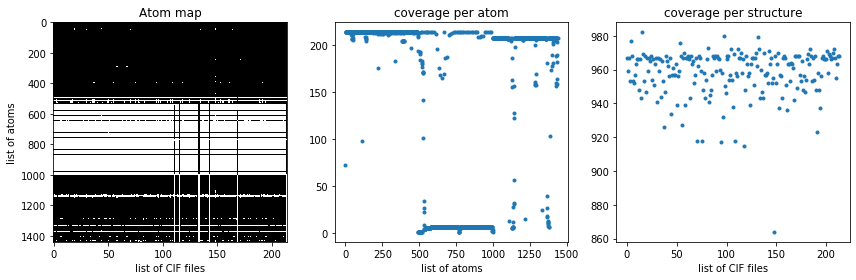

In [6]:
source_dir, target_dir = pdbclean_io.define_dirs(project_dir=PROJDIR, source='1pt_bank', target='test_homogen_bank')
input_list = pdbclean_io.list_files_in_dir(path=source_dir, ext='.cif')
keychain = cif.pdbs_to_keychain(input_list, verbose=True)
atommap = cif.keychain_to_atommap(keychain, input_list, verbose=True)
viz.show_atommap(atommap)

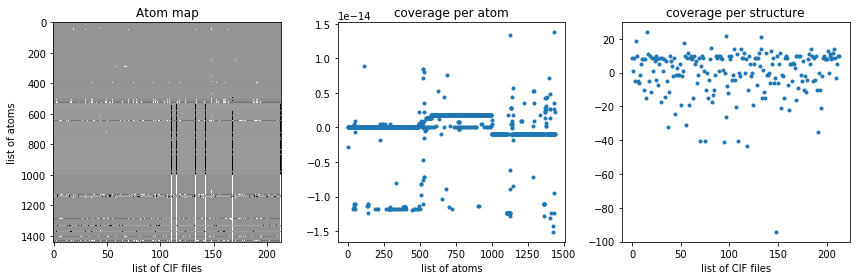

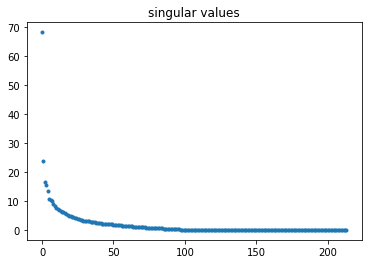

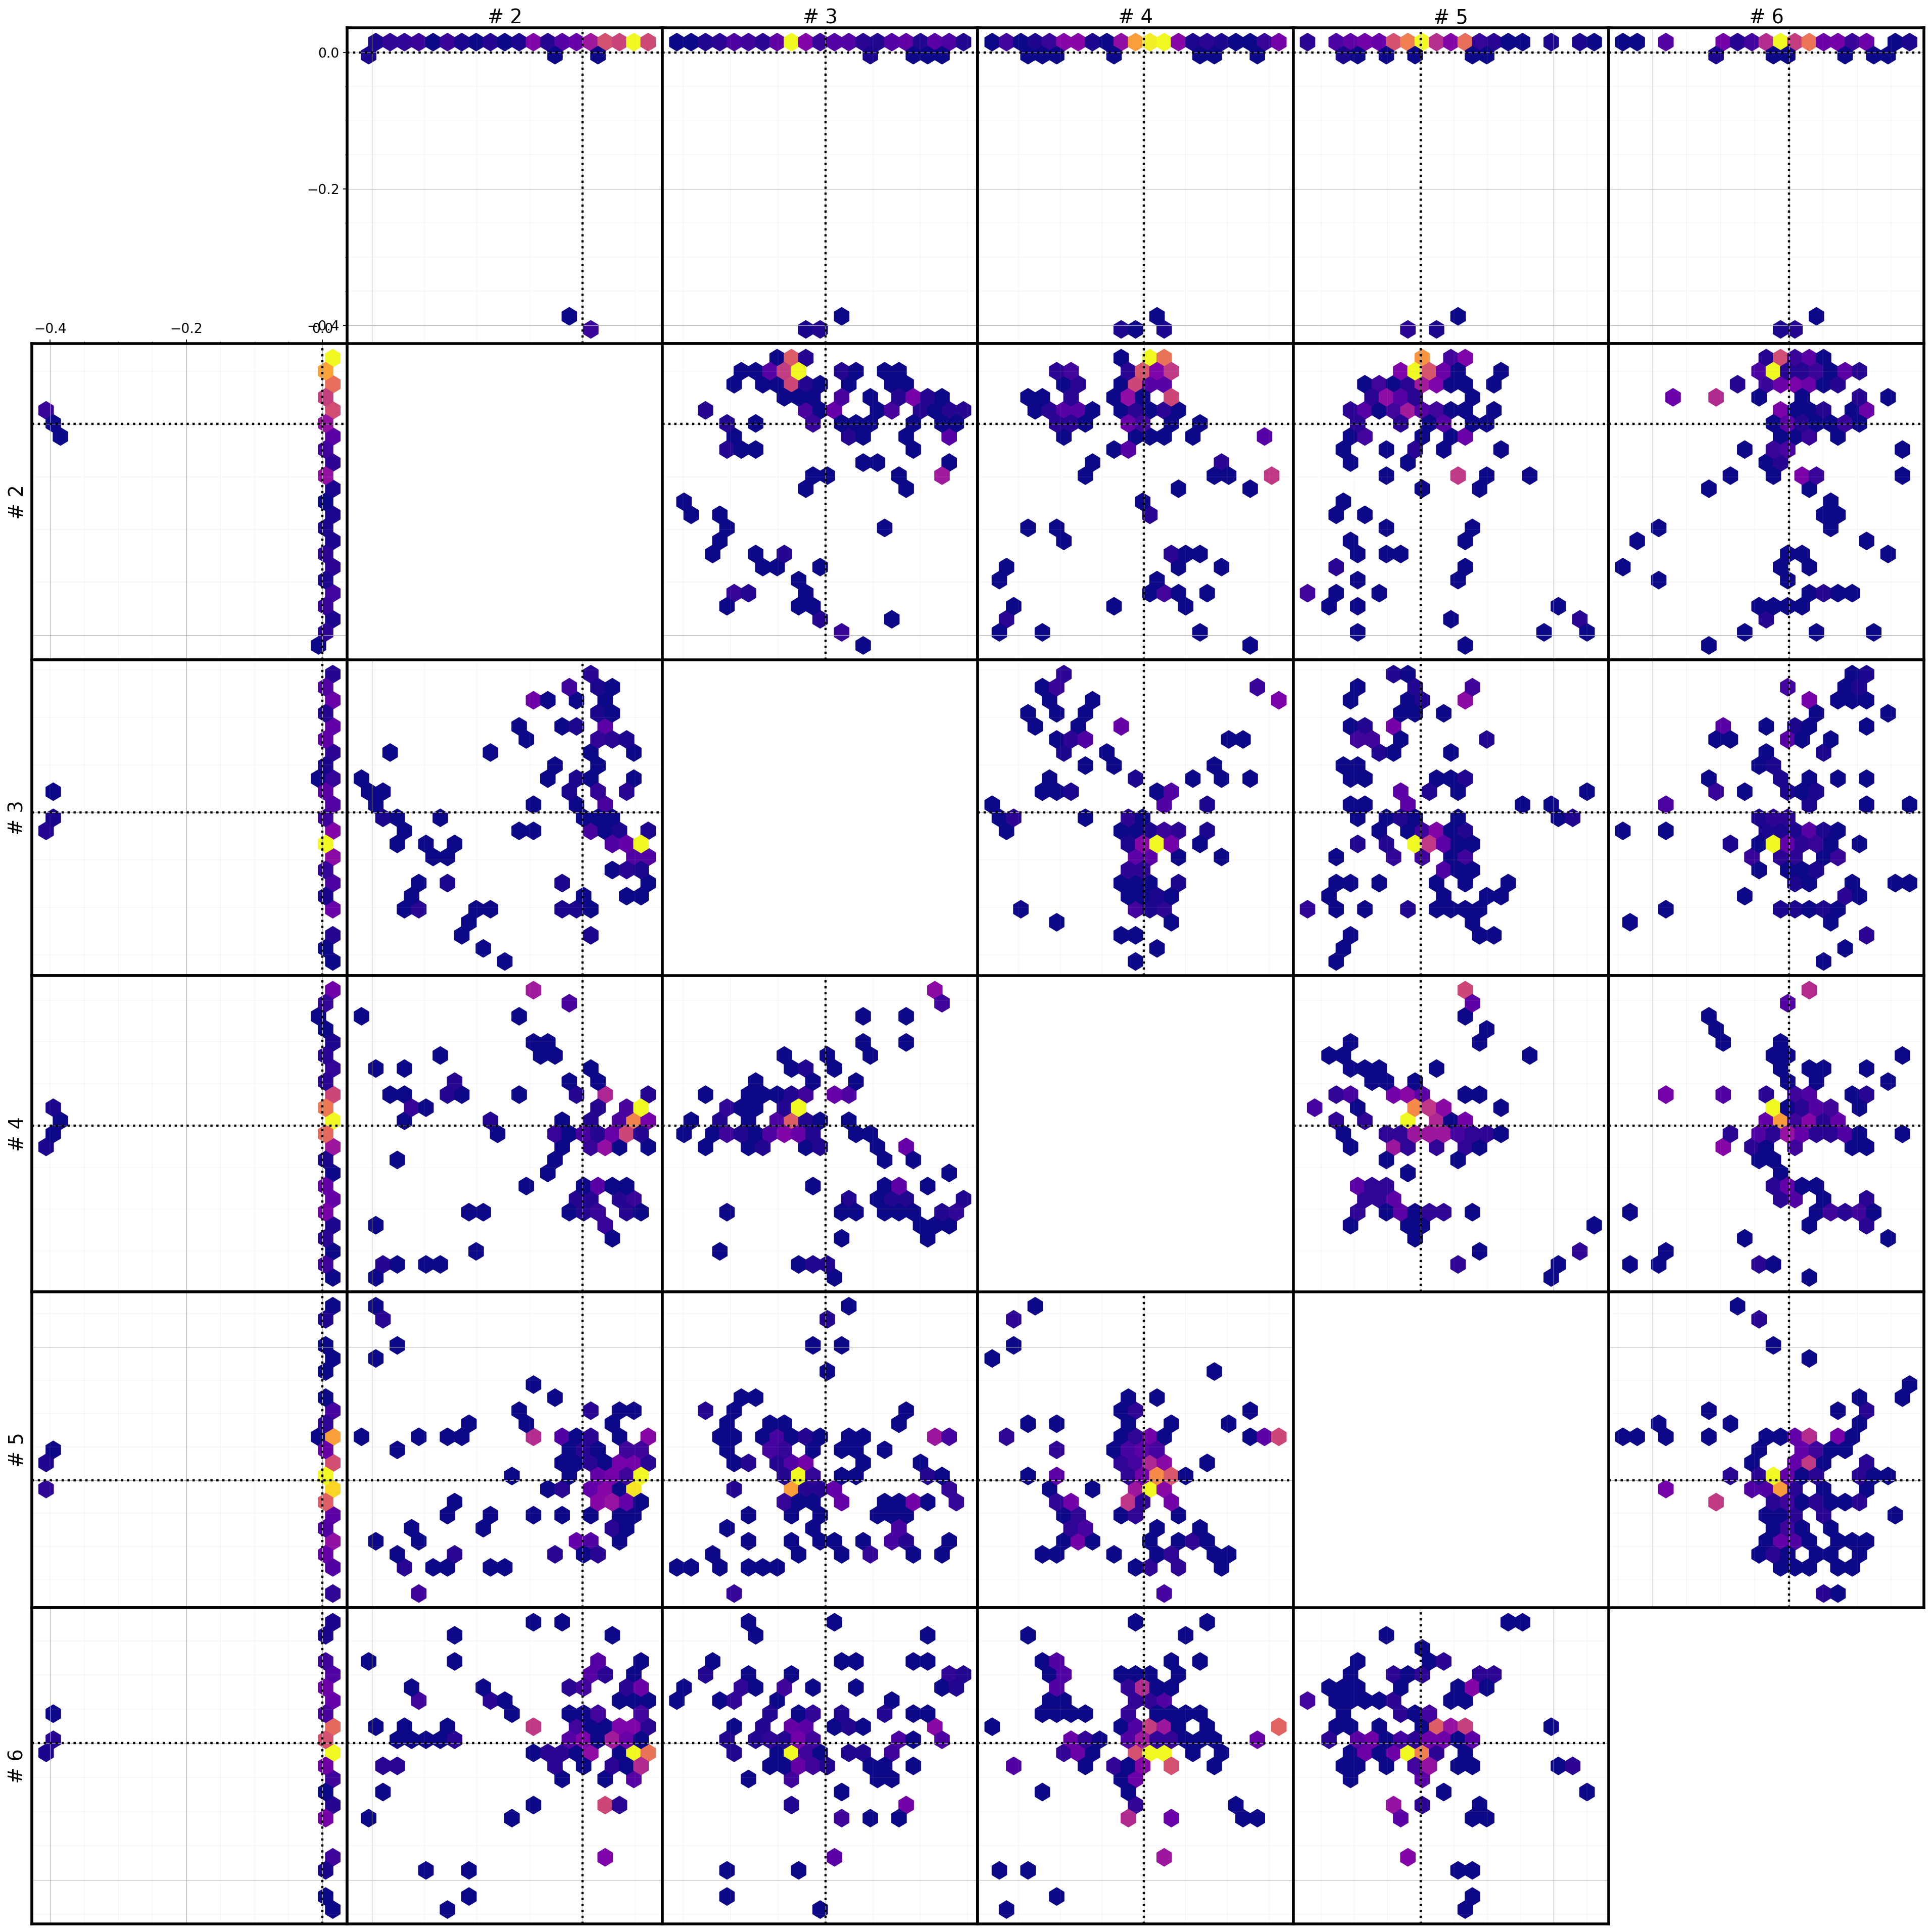

In [10]:
atommap_centered = (atommap.T - np.mean(atommap, axis=1)).T
U, s, Vh = linalg.svd(atommap_centered)
viz.show_atommap(atommap_centered)
plt.show()
plt.title('singular values')
plt.plot(s, '.')
plt.show()
analysis.biplots(prj=Vh.T, prj2=Vh.T, n=6, nbins=20)

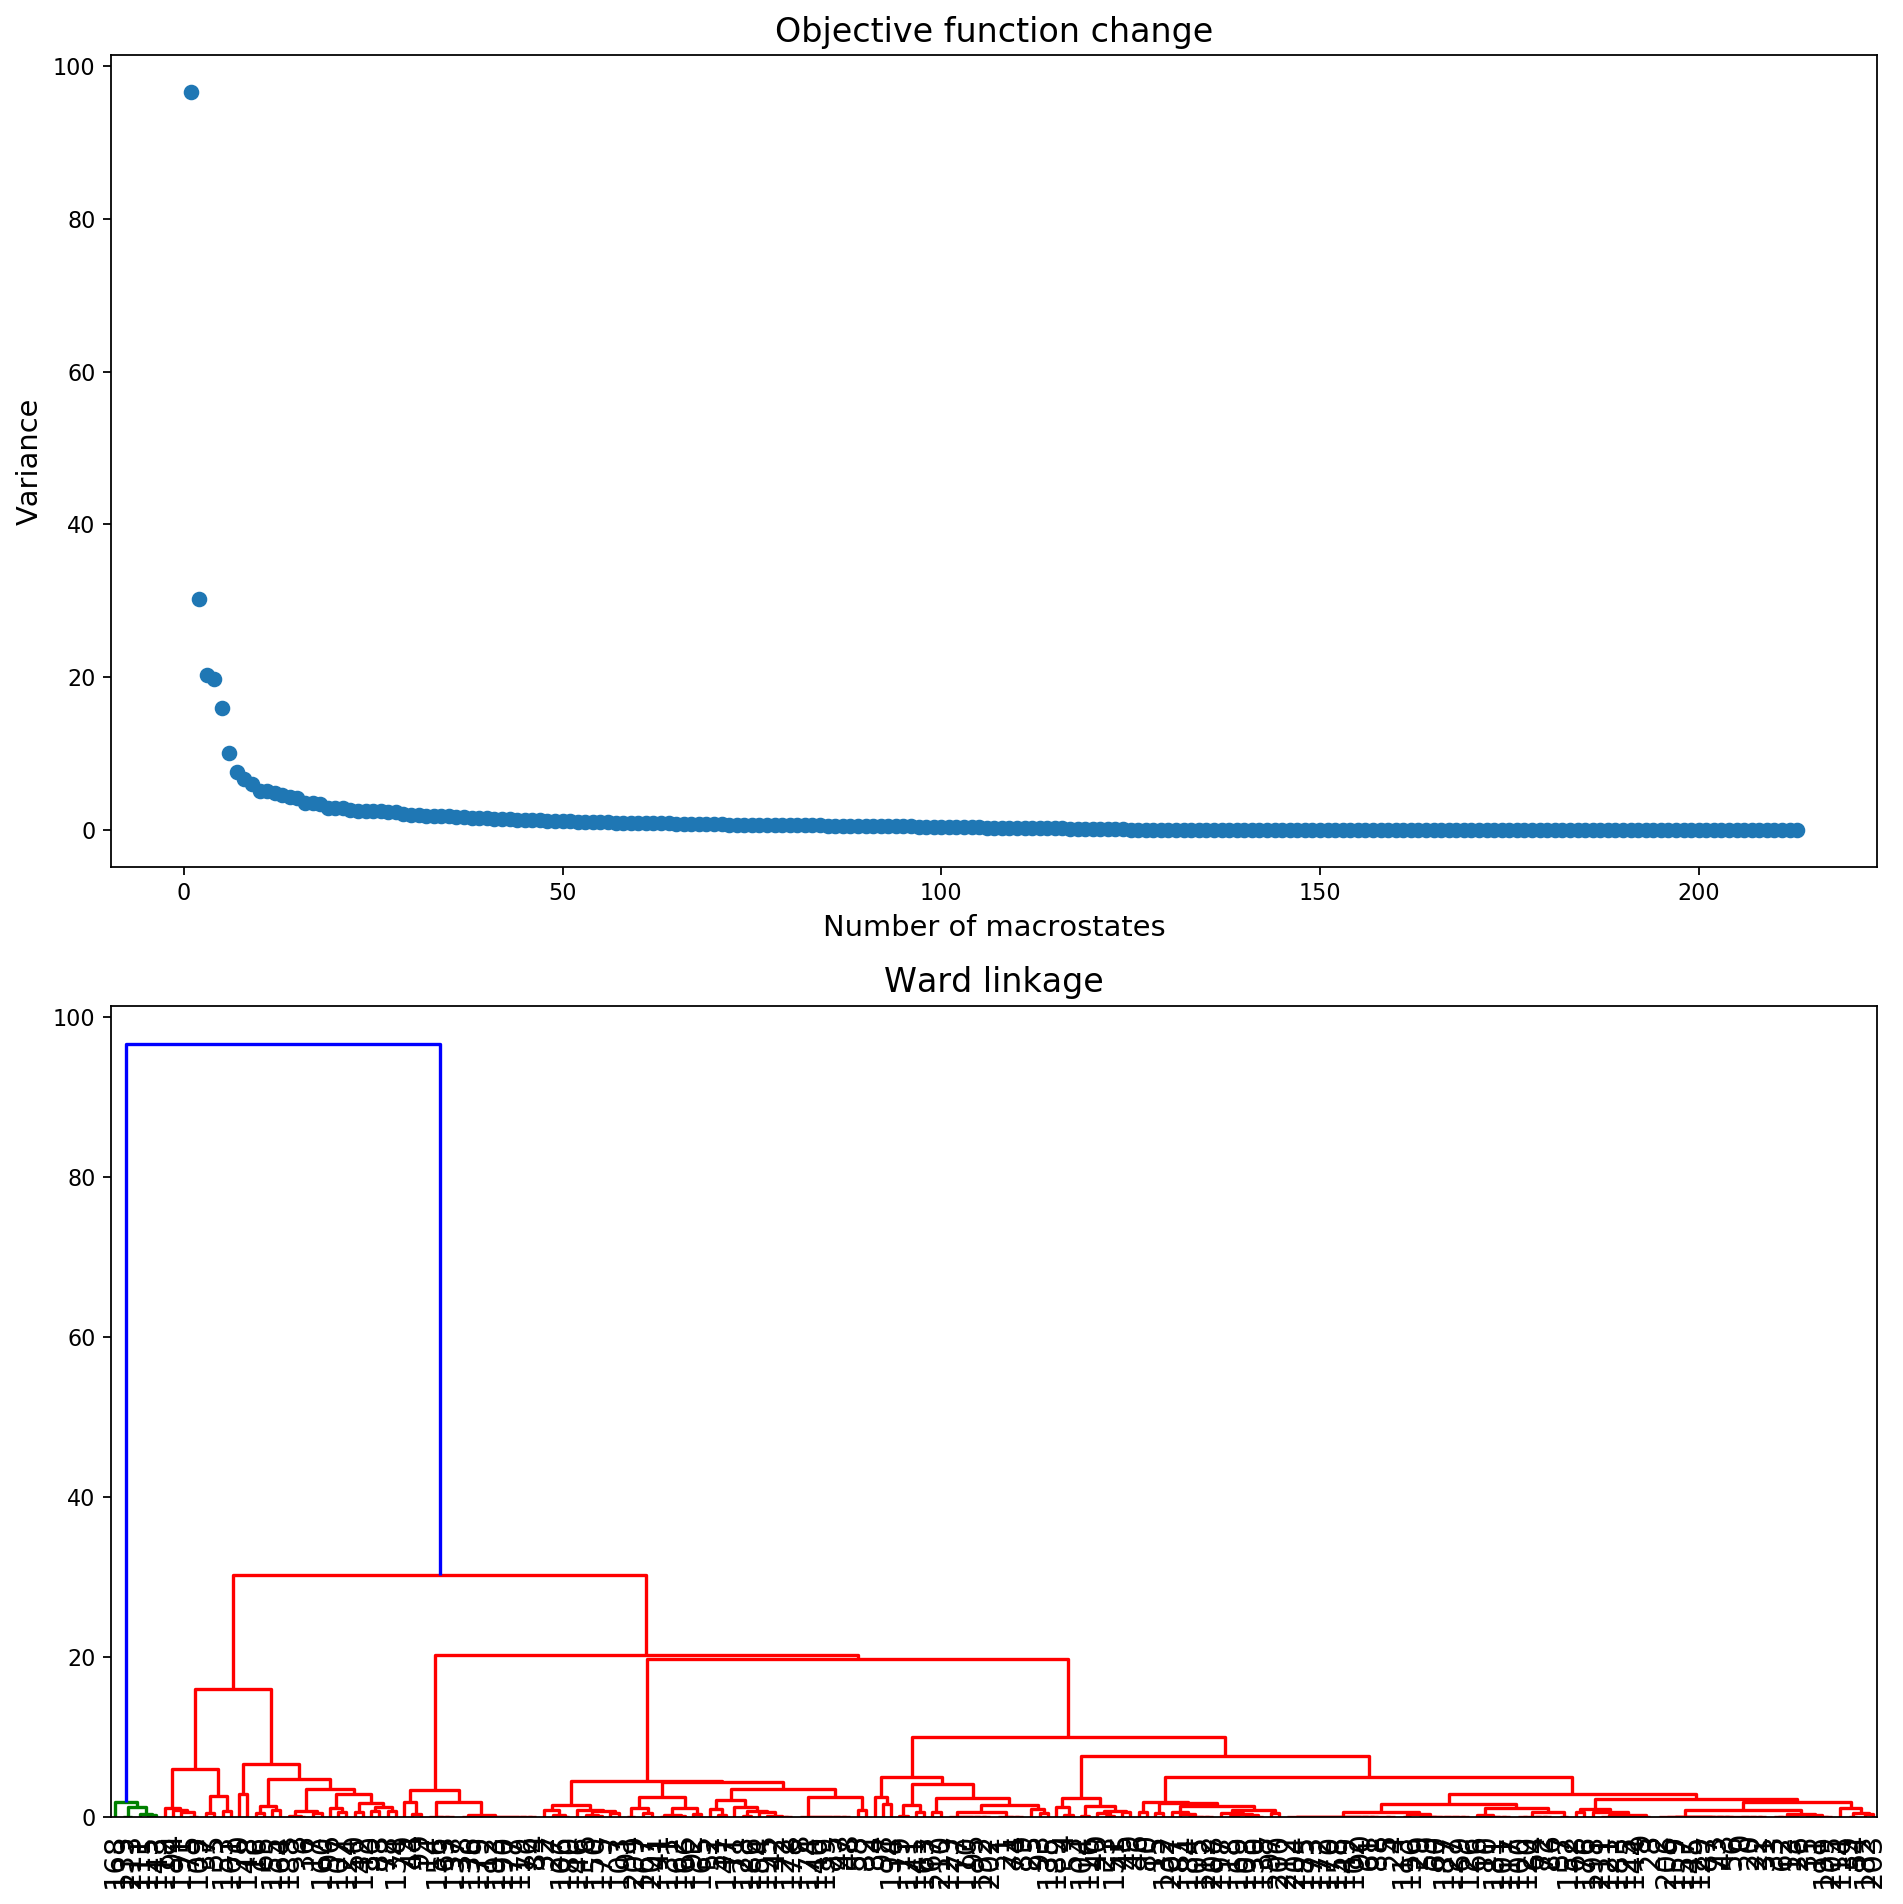

In [12]:
nmax = 5
atommap_approx = np.dot(U[:,0:nmax], np.dot(np.diag(s[0:nmax]), Vh[0:nmax,:]))
distance = scipy.spatial.distance.pdist(atommap_approx.T)
clusters = scipy.cluster.hierarchy.linkage(distance, method='ward')
analysis.plot_cluster(clusters, atommap_centered.T)

In [13]:
cutoff=1.0*np.amax(scipy.spatial.distance.squareform(distance))
print(cutoff)

29.1085573406


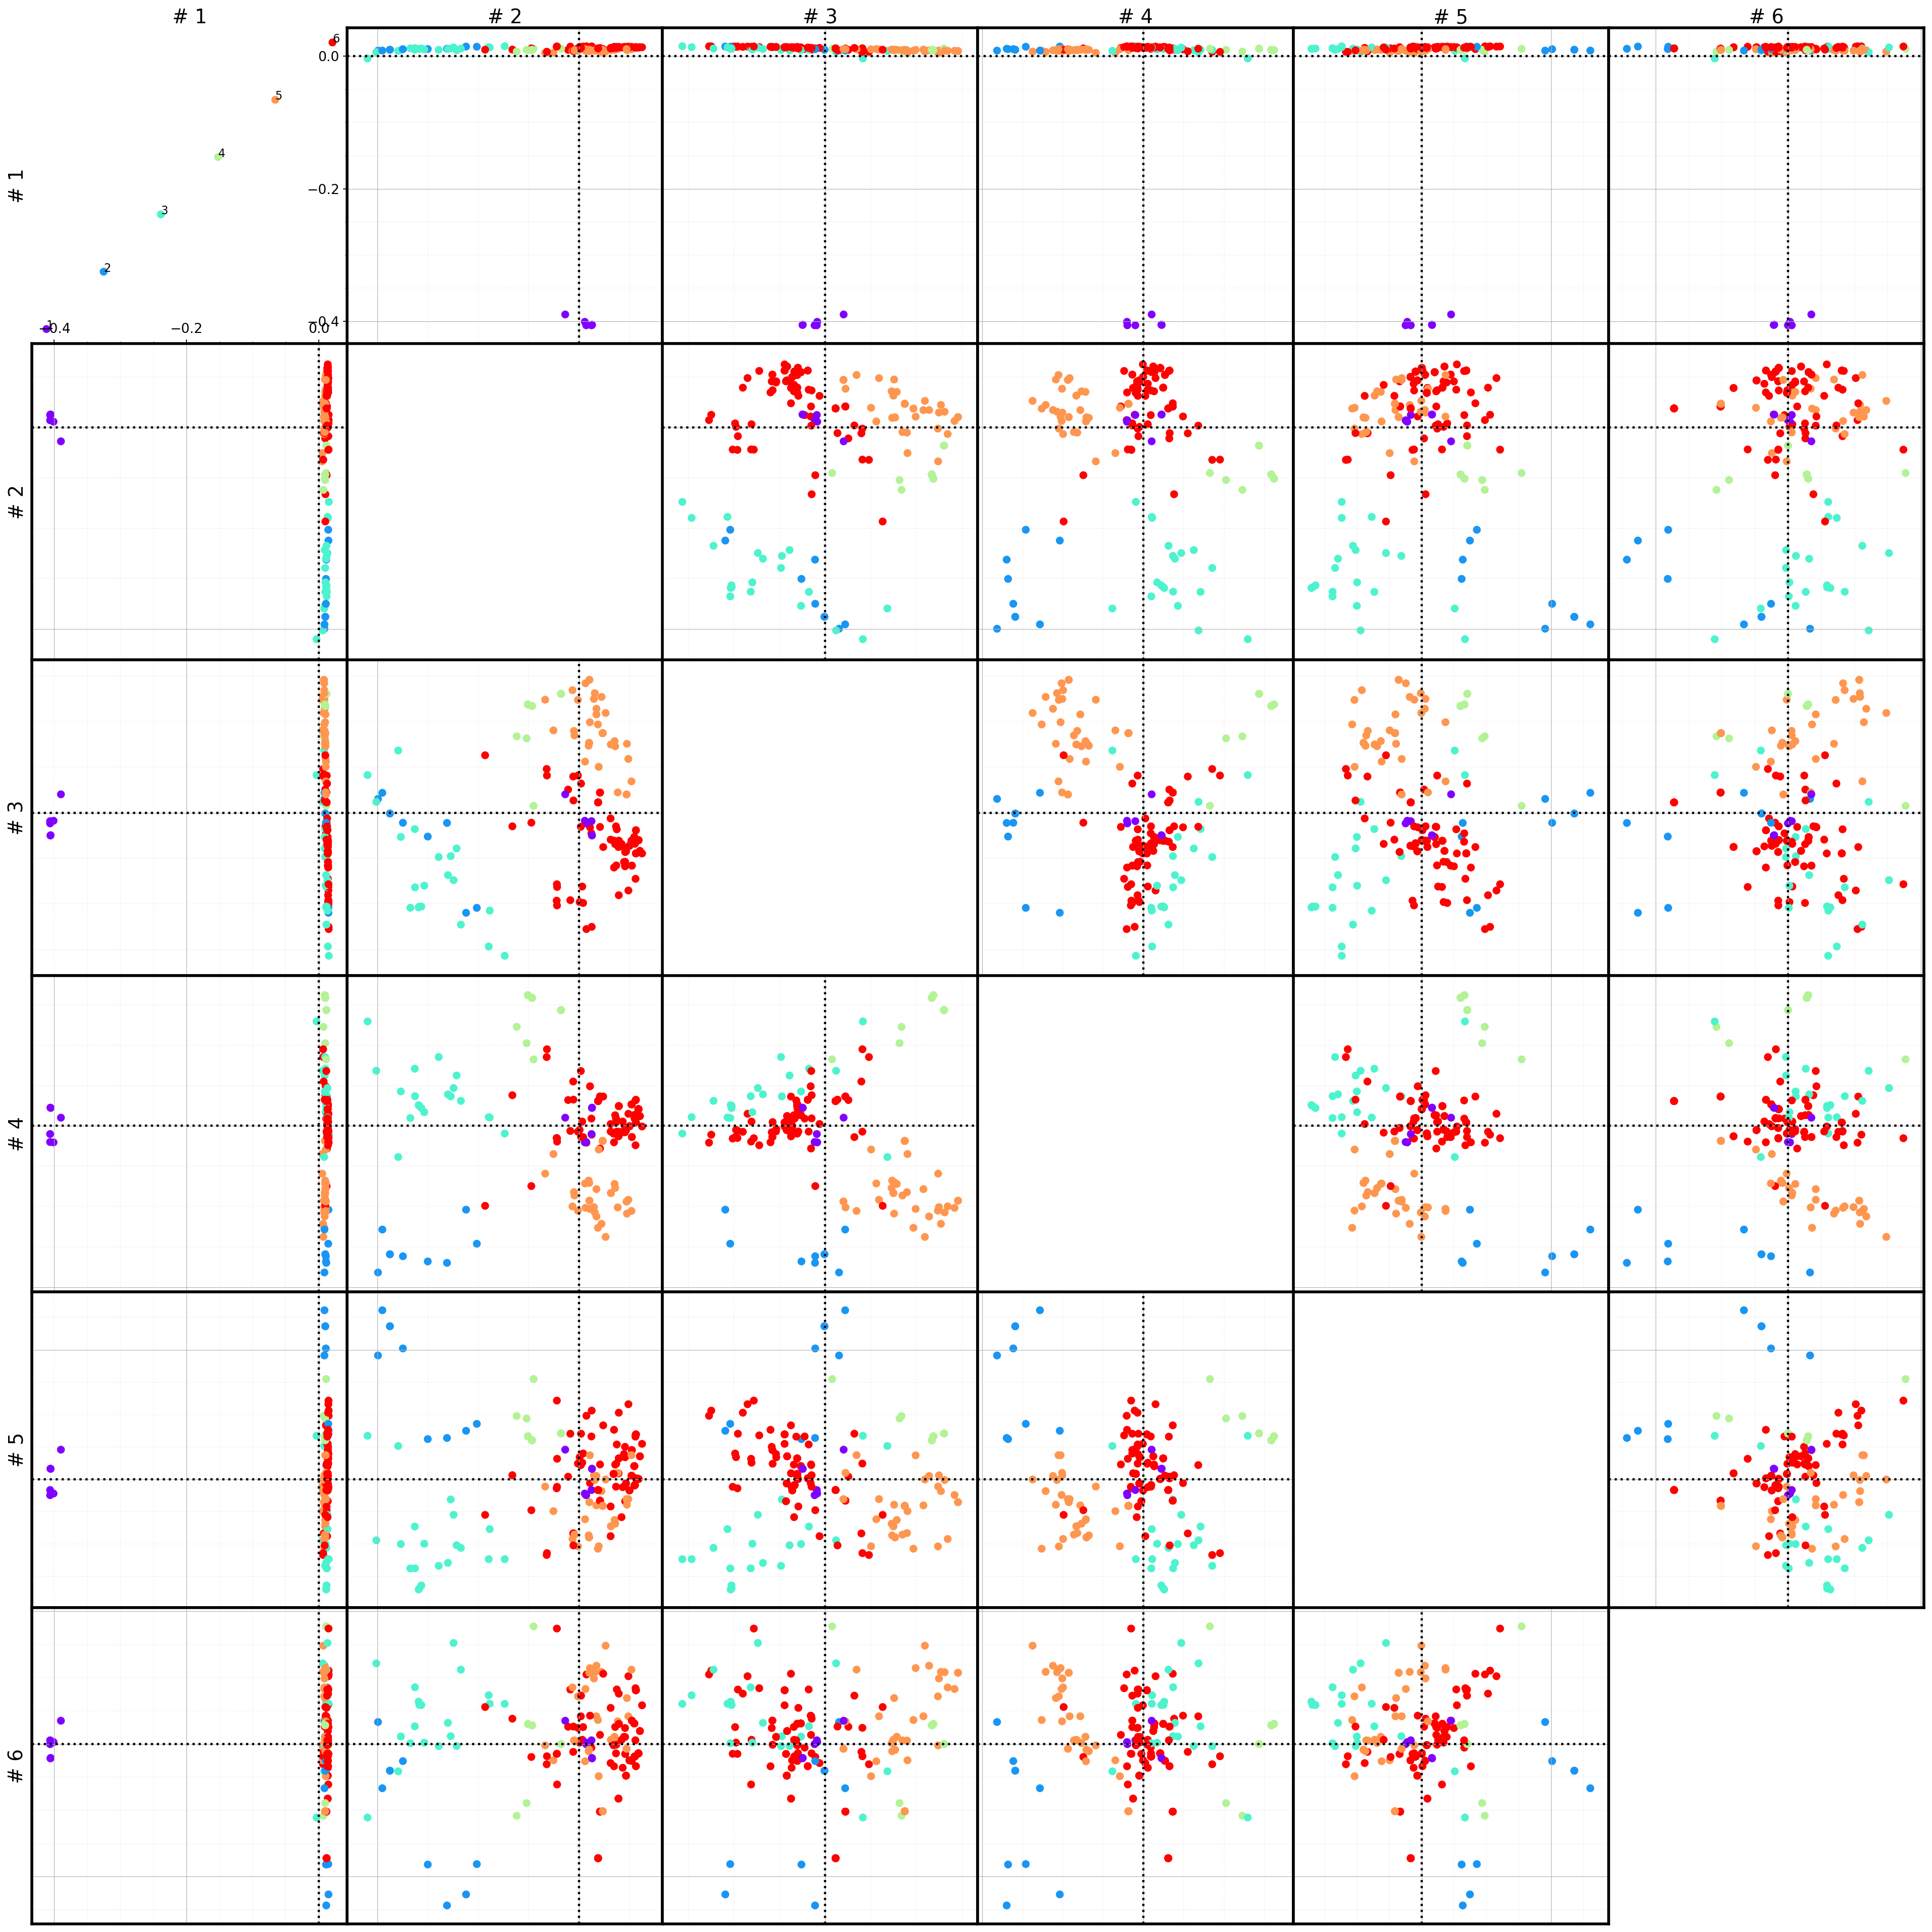

In [15]:
n_clusters = 6
assignment = analysis.get_assignment(clusters,n_clusters)
analysis.biplots(prj=Vh.T, prj2=Vh.T, n=6, nbins=100, c=assignment)

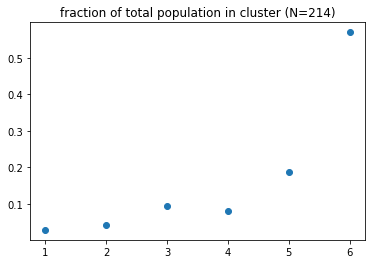

In [31]:
unique, counts = np.unique(assignment, return_counts=True)
plt.title('fraction of total population in cluster (N={0})'.format(assignment.shape[0]))
plt.plot(unique, counts/assignment.shape[0], 'o')
plt.show()